# Shift ML 2025  (Test Part)

 Этот ноутбук содержит расчёты, которые использовались для ответов на вопросы теста.

In [ ]:
%pip install seaborn
%pip install --upgrade numpy pandas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

# Загрузка тренировочного датасета
df = pd.read_csv('shift_ml_2025_train.csv')
df.head()

C:\Users\kiril\AppData\Local\Temp\ipykernel_46384\1393968543.py:9: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('shift_ml_2025_train.csv')


,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,...,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,"1,235,000.00",3 года,11.99,"41,014.00",В,В1,инженер,10+ лет,ИПОТЕКА,...,7.70,0.00,0.00,"15,700,850.00","1,973,750.00","3,965,000.00","1,233,350.00",NaN,Нет,Наличные
1,68341763,"1,000,000.00",5 лет,10.78,"21,633.00",Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,...,50.00,0.00,0.00,"10,920,900.00","934,800.00","310,000.00","743,850.00",NaN,Нет,Наличные
2,68426831,"597,500.00",3 года,13.44,"20,259.00",В,В3,ветеринарный техник,4 года,АРЕНДА,...,100.00,0.00,0.00,"845,000.00","639,900.00","470,000.00","200,000.00",NaN,Нет,Наличные
3,68476668,"1,000,000.00",3 года,9.17,"31,879.00",Б,Б2,вице-президент операций по набору персонала,10+ лет,ИПОТЕКА,...,100.00,0.00,0.00,"19,442,600.00","5,838,100.00","1,575,000.00","2,322,600.00",NaN,Нет,Наличные
4,67275481,"1,000,000.00",3 года,8.49,"31,563.00",Б,Б1,дорожному водителю,10+ лет,ИПОТЕКА,...,0.00,0.00,0.00,"9,669,500.00","1,396,850.00","725,000.00","1,807,200.00",NaN,Нет,Наличные


## 1. 25‑й квантиль признака годовой_доход

In [2]:
df['годовой_доход'].quantile(0.25)

np.float64(915200.0)

## 2. Замена пропусков медианой в колонке годовой_доход

## 3. Строки, где итоговый_статус_займа = 1

In [ ]:
df['годовой_доход'] = df['годовой_доход'].fillna(df['годовой_доход'].median())

In [ ]:

df1 = df[df['итоговый_статус_займа'] == 1]


df2 = df.loc[df['итоговый_статус_займа'] == 1]

# filter не работает для логической фильтрации по значениям
# df.filter(итоговый_статус_займа.like=1) 

df3 = df.query("итоговый_статус_займа == 1")


## 4. Корреляция между сумма_займа и годовой_доход

In [2]:
# Вариант 1 — верный
corr1 = df['сумма_займа'].corr(df['годовой_доход'])
print("Корреляция (вариант 1):", corr1)

# Вариант 3 — тоже верный
corr_matrix = df[['сумма_займа', 'годовой_доход']].corr()
print("\nКорреляционная матрица (вариант 3):\n", corr_matrix)

# Вариант 2 — вызовет ошибку
# df.corrwith('сумма_займа', 'годовой_доход')  # 

# Вариант 4 — не существует такой функции
# pd.corr(df['сумма_займа'], df['годовой_доход'])  # 


Корреляция (вариант 1): 0.3119181397547345

Корреляционная матрица (вариант 3):
                сумма_займа  годовой_доход
сумма_займа           1.00           0.31
годовой_доход         0.31           1.00


## 5. Средний итоговый_статус_займа в зависимости от рейтинга

In [3]:
df.groupby('рейтинг')['итоговый_статус_займа'].mean()

рейтинг
А   0.06
Б   0.13
В   0.22
Г   0.30
Д   0.38
Е   0.45
Ж   0.50
Name: итоговый_статус_займа, dtype: float64

## 6. Как рассчитать 3-месячное скользящее среднее сумма_дефолта по регионам?

Выбран вариант:
`df.set_index('дата_выдачи_займа').groupby('регион')['сумма_дефолта'].rolling('90D').mean()`

Комментарий:  
Поскольку скользящее среднее должно рассчитываться по времени, важно, чтобы индексом была дата. В этом варианте группировка по регионам сохраняется, и rolling('90D') работает по дате. Остальные варианты либо не учитывают регионы, либо не работают с временным окном.


In [ ]:
df.set_index('дата_выдачи_займа').groupby('регион')['сумма_дефолта'].rolling('90D').mean()

## 7. Средняя сумма займа инженеров с рейтингом «Б»

Код ниже фильтрует инженеров (профессия_заемщика == "инженер") с рейтингом «Б» и выводит среднюю `сумма_займа.


In [5]:
# Фильтруем инженеров с рейтингом "Б"
eng_B = df[(df['профессия_заемщика'] == 'инженер') & (df['рейтинг'] == 'Б')]

# Средняя сумма займа
mean_loan = eng_B['сумма_займа'].mean()
mean_loan


np.float64(772842.0256991686)

## 8. Признак с наибольшим числом пропусков


In [6]:
# Считаем количество пропусков по каждому столбцу и сортируем по убыванию
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts.head()


дата_следующей_выплаты                               1210779
кредитный_баланс_по_возоб_счетам                     1193971
совокупный_статус_подтверждения_доходов_заемщиков    1187729
совокупный_пдн_заемщиков                             1187548
совокупный_доход_заемщиков                           1187546
dtype: int64

## 9. Уникальные значения признака тип_предоставления_кредита


In [7]:
# Список уникальных значений
df['тип_предоставления_кредита'].dropna().unique()


array(['Наличные', 'Перевод'], dtype=object)

## 10. T-тест для рейтинга «Ж»

Размеры групп ~4 000 записей, p-value = 0.33 (> 0.05)  
→ различие средних статистически незначимо, нулевая гипотеза НЕ отвергается.



In [8]:
from scipy import stats

# Фильтруем рейтинг = 'Ж'
mask = df['рейтинг'] == 'Ж'
group_paid   = df[mask & (df['итоговый_статус_займа'] == 1)]['сумма_займа']
group_unpaid = df[mask & (df['итоговый_статус_займа'] == 0)]['сумма_займа']

# Размеры групп
print(f"Paid group size   : {len(group_paid)}")
print(f"Unpaid group size : {len(group_unpaid)}")

# T-тест (Welch, т.к. дисперсии могут различаться)
t_stat, p_val = stats.ttest_ind(group_paid, group_unpaid,
                                equal_var=False, nan_policy='omit')
print(f"p-value = {p_val:.3f}")


Paid group size   : 4074
Unpaid group size : 4118
p-value = 0.330


## 11. Boxplot годового дохода по статусу займа

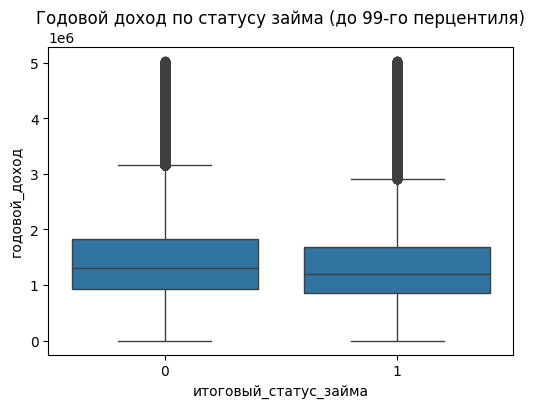

In [10]:
# Обрезаем по 99-му перцентилю, чтобы убрать экстремальные выбросы
filtered_df = df[df['годовой_доход'] < df['годовой_доход'].quantile(0.99)]

plt.figure(figsize=(6,4))
sns.boxplot(x='итоговый_статус_займа', y='годовой_доход', data=filtered_df)
plt.title('Годовой доход по статусу займа (до 99‑го перцентиля)')
plt.show()



## 12. Почему accuracy = 0.95 при ROC AUC = 0.65?

**Ответ:** сильный дисбаланс классов.

Обоснование: при преобладании одного класса модель может почти всегда
выдавать его, получая accuracy ≈ доля крупного класса (0.95),
но ROC AUC остаётся низким (0.65), потому что различать оба класса
модель умеет слабо.


## 13. Значение ROC AUC, указывающее на наилучшее качество предсказаний


Объяснение:  
ROC AUC показывает, насколько хорошо модель различает два класса.  
Чем ближе к 1.0 тем лучше.

 0.9  модель почти идеально отличает классы.
 0.5  модель работает случайно, как подбрасывание монетки.
 0.1 или 0 —модель всё путает или метки могли быть перепутаны.

Поэтому **0.9** — наилучший результат среди предложенных.


## 14. Boxplot сумма_займа по рейтингам


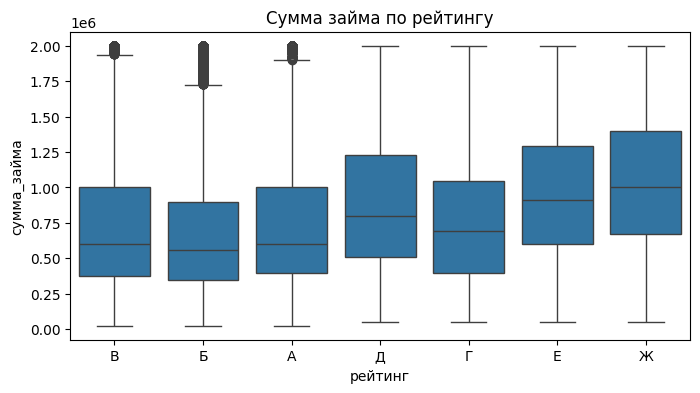

In [11]:


plt.figure(figsize=(8,4))
sns.boxplot(
    x='рейтинг',
    y='сумма_займа',
    data=df,
    order=['В','Б','А','Д','Г','Е','Ж']  
)
plt.title('Сумма займа по рейтингу')
plt.show()
